In [1]:
# import libraries
# %load ../pyscripts/0937-test-spatialcorrelator.py
%matplotlib inline
import numpy as np
from pyCXD.tools.CrossCorrelator import CrossCorrelator
import matplotlib.pyplot as plt

# for some convolutions
def convol2d(a,b=None,axes=(-2,-1)):
    ''' convolve a and b along axes axes
        if axes 1 element, then convolves along that dimension
        only works with dimensions 1 or 2 (1 or 2 axes)
    '''
    from numpy.fft import fft2, ifft2
    if(b is None):
        b = a
    return ifft2(fft2(a,axes=axes)*np.conj(fft2(b,axes=axes)),axes=axes).real

In [2]:
#this test is just meant to show an example
# for a test for nosetests, reduce number points to something manageable like 10-50
# random seed for reproducibility
np.random.seed(123)

In [3]:
# test 1D data
sigma = .1
Npoints = 1000
x = np.linspace(-10, 10, Npoints)
y = convol2d(np.random.random(Npoints)*10, np.exp(-x**2/(2*sigma**2)),axes=(-1,))

mask_1D = np.ones_like(y)
mask_1D[10:20] = 0
mask_1D[60:90] = 0
mask_1D[111:137] = 0
mask_1D[211:237] = 0
mask_1D[411:537] = 0

mask_1D *= mask_1D[::-1]

y_masked = y*mask_1D

cc1D = CrossCorrelator(mask_1D.shape)
cc1D_symavg = CrossCorrelator(mask_1D.shape,normalization='symavg')
cc1D_masked = CrossCorrelator(mask_1D.shape,mask=mask_1D)
cc1D_masked_symavg = CrossCorrelator(mask_1D.shape, mask=mask_1D,normalization='symavg')

ycorr_1D = cc1D(y)
ycorr_1D_masked = cc1D_masked(y*mask_1D)
ycorr_1D_symavg = cc1D_symavg(y)
ycorr_1D_masked_symavg = cc1D_masked_symavg(y*mask_1D)


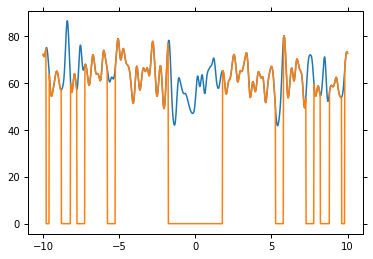

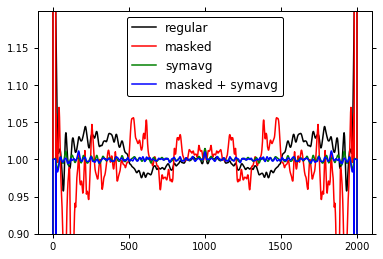

In [4]:
# plot 1D Data
plt.figure(0);plt.clf();
plt.plot(x,y)
plt.plot(x,y*mask_1D)


plt.figure(1);plt.clf();
plt.plot(ycorr_1D,color='k',label='regular')
plt.plot(ycorr_1D_masked,color='r',label='masked')
plt.plot(ycorr_1D_symavg,color='g',label='symavg')
plt.plot(ycorr_1D_masked_symavg,color='b',label='masked + symavg')
plt.ylim(.9,1.2)
plt.legend()

In [5]:
# test 2D data
Npoints2 = 100
x2 = np.linspace(-10, 10, Npoints2)
X, Y = np.meshgrid(x2,x2)
Z = np.random.random((Npoints2,Npoints2))
Z = convol2d(Z, np.exp(-(X**2 + Y**2)/2./sigma**2))

mask_2D = np.ones_like(Z)
mask_2D[10:20, 10:20] = 0
mask_2D[73:91, 45:67] = 0
mask_2D[1:20, 90:] = 0

cc2D = CrossCorrelator(mask_2D.shape)
cc2D_symavg = CrossCorrelator(mask_2D.shape,normalization='symavg')
cc2D_masked = CrossCorrelator(mask_2D.shape,mask=mask_2D)
cc2D_masked_symavg = CrossCorrelator(mask_2D.shape, mask=mask_2D,normalization='symavg')

ycorr_2D = cc2D(Z)
ycorr_2D_masked = cc2D_masked(Z*mask_2D)
ycorr_2D_symavg = cc2D_symavg(Z)
ycorr_2D_masked_symavg = cc2D_masked_symavg(Z*mask_2D)

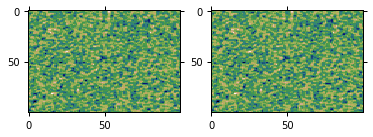

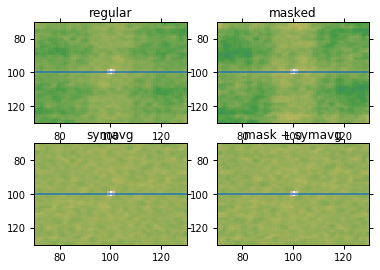

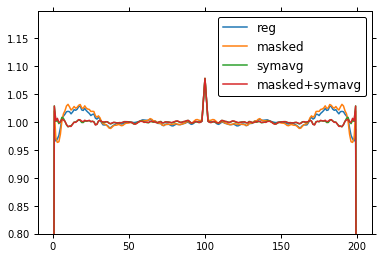

In [6]:
plt.figure(2);plt.clf();
plt.subplot(2,2,1)
plt.imshow(Z)

plt.subplot(2,2,2)
plt.imshow(Z)

vmin=.95; vmax=1.03

plt.figure(3);plt.clf();
plt.subplot(2,2,1)
plt.title("regular")
plt.imshow(ycorr_2D)
plt.axhline(ycorr_2D_masked.shape[0]//2)
plt.clim(vmin,vmax)
plt.xlim(70,130)
plt.ylim(130,70)
plt.subplot(2,2,2)
plt.title("masked")
plt.imshow(ycorr_2D_masked)
plt.axhline(ycorr_2D_masked.shape[0]//2)
plt.clim(vmin,vmax)
plt.xlim(70,130)
plt.ylim(130,70)
plt.subplot(2,2,3)
plt.title("symavg")
plt.imshow(ycorr_2D_symavg)
plt.axhline(ycorr_2D_masked.shape[0]//2)
plt.clim(vmin,vmax)
plt.xlim(70,130)
plt.ylim(130,70)
plt.subplot(2,2,4)
plt.title("mask + symavg")
plt.imshow(ycorr_2D_masked_symavg)
plt.axhline(ycorr_2D_masked.shape[0]//2)
plt.clim(vmin,vmax)
plt.xlim(70,130)
plt.ylim(130,70)

plt.figure(4);plt.clf();
plt.plot(ycorr_2D[ycorr_2D.shape[0]//2],label="reg")
plt.plot(ycorr_2D_masked[ycorr_2D_masked.shape[0]//2],label="masked")
plt.plot(ycorr_2D_symavg[ycorr_2D_symavg.shape[0]//2],label="symavg")
plt.plot(ycorr_2D_masked_symavg[ycorr_2D_masked_symavg.shape[0]//2],label="masked+symavg")
plt.ylim(0.8, 1.2)
plt.legend()